Employee Performance Prediction in Garment Industry

Kaggle link: https://www.kaggle.com/datasets/gauravduttakiit/employee-performance-prediction?select=train_dataset.csv

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import cut_the_tails as ct
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_sets\\employee_performance.csv')
target = 'actual_productivity'

In [3]:
features = ['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'month',
 'quarter_Quarter1',
 'quarter_Quarter2',
 'quarter_Quarter3',
 'quarter_Quarter4',
 'quarter_Quarter5',
 'department_finishing']

In [4]:
fig = px.histogram(df, x=target, nbins=40)
fig.show()

# Cauda Ótima

[0.05, 1.0]


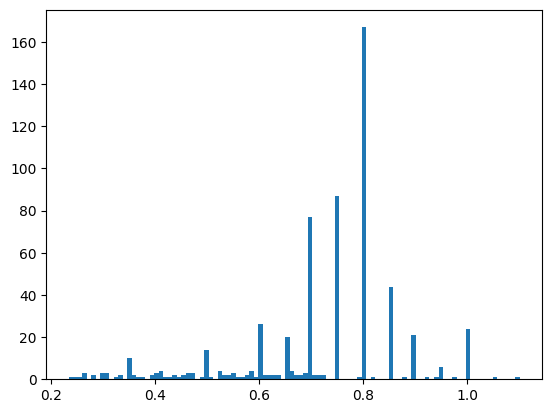

In [5]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)

model = DecisionTreeRegressor(random_state=0, max_depth=5) 
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)

optimal = ct.get_optimal_percentiles(df, target, features, classifier, model, 'normal', 'brute-force', 2)

print(optimal)

In [41]:
cdf = ct.split_by_quantile_class(df,target,[0.55,0.9])

#dropping all rows with NaN values
cdf.dropna(inplace=True)

In [42]:
X = cdf[features].to_numpy()
y_tail = cdf['tail_class'].to_numpy()
y = cdf[target].to_numpy()

###Using split###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_aux, X_test_aux, y_train_tail, y_test_tail = train_test_split(X, y_tail, test_size=0.2, random_state=0)

In [43]:
#baseline = RandomForestRegressor(max_depth=5, random_state=0)
baseline = XGBRegressor(n_estimators=100, max_leaves=0, random_state = 0)
#baseline = DecisionTreeRegressor(random_state=0, max_depth=5) 

In [44]:
#tail_classifier = ct.fit_tail_classifier(X,y_tail,RandomForestClassifier(max_depth=5, random_state=0))
#tail_classifier = ct.fit_tail_classifier(X,y_tail,XGBClassifier(n_estimators=100, max_leaves=0, random_state = 0))
#tail_classifier = ct.fit_tail_classifier(X,y_tail,DecisionTreeClassifier(random_state=0, max_depth=5)) 

###Using split###
#tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,RandomForestClassifier(max_depth=5, random_state=0))
tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,XGBClassifier(n_estimators=100, max_leaves=0, random_state = 0))
#tail_classifier = ct.fit_tail_classifier(X_train,y_train_tail,DecisionTreeClassifier(random_state=0, max_depth=5)) 

In [45]:
#models = ct.fit_tail_models(X,y,y_tail,baseline)

###Using split###
models = ct.fit_tail_models(X_train,y_train,y_train_tail,baseline)

In [46]:
#baseline.fit(X,y)
#y_base = baseline.predict(X)
#y_tail = ct.batch_tail_predict(X,tail_classifier,models)

###Using split###
baseline.fit(X_train,y_train)
y_base = baseline.predict(X_test)
y_tail = ct.batch_tail_predict(X_test,tail_classifier,models)

In [47]:
#print(mean_absolute_error(y_base,y))
#print(mean_absolute_error(y_tail,y))
#print(mean_absolute_error(y,y))

###Using split###
print(mean_absolute_error(y_base,y_test))
print(mean_absolute_error(y_tail,y_test))
print(mean_absolute_error(y_test,y_test))

0.03290087462417488
0.029412790575270457
0.0


In [48]:
#print(mean_absolute_percentage_error(y_base,y))
#print(mean_absolute_percentage_error(y_tail,y))
#print(mean_absolute_percentage_error(y,y))

###Using split###
print(mean_absolute_percentage_error(y_base,y_test))
print(mean_absolute_percentage_error(y_tail,y_test))
print(mean_absolute_percentage_error(y_test,y_test))

0.05468057465861563
0.05022738053315782
0.0
